In [ ]:
!rm ds-abandono.xls
!wget https://github.com/bdm-unlu/2021/raw/main/TPs/TP05/TP0502/ds-abandono.xls

--2021-11-05 14:56:53--  https://github.com/bdm-unlu/2021/raw/main/TPs/TP05/TP0502/ds-abandono.xls
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0502/ds-abandono.xls [following]
--2021-11-05 14:56:54--  https://raw.githubusercontent.com/bdm-unlu/2021/main/TPs/TP05/TP0502/ds-abandono.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4633088 (4.4M) [application/octet-stream]
Saving to: ‘ds-abandono.xls’

ds-abandono.xls     100%[===================>]   4.42M  --.-KB/s    in 0.08s   

2021-11-05 14:56:54 (58.8 MB/s) - ‘ds-abandono.xls’ saved [4633088/4633088]



In [ ]:
import pandas as pd
abandono = pd.read_excel("ds-abandono.xls")

#feature_names = list(abandono.columns)

#feature_names.remove("legajo")

feature_names = ['estado_civil','carrera','horas_trabajadas','edad_ingreso', "estado"]


In [ ]:
abandono = abandono[feature_names]
abandono.head()

,estado_civil,carrera,horas_trabajadas,edad_ingreso,estado
0,SOLTERO/A,LICENCIATURA EN ENFERMERIA,0,22,INHABILITADO
1,UNIDO/A,LICENCIATURA EN TRABAJO SOCIAL,0,21,LIBRE
2,CASADO/A,LICENCIATURA EN CS. DE LA EDUCACION,0,54,LIBRE
3,SOLTERO/A,CONTADOR PUBLICO,0,28,LIBRE
4,SOLTERO/A,CONTADOR PUBLICO,24,28,REGULAR


In [ ]:
from sklearn import preprocessing

#columns = ["estado_civil", "carrera", "sede", "estado"]

columns = ["estado_civil", "carrera", "estado"]

le = preprocessing.LabelEncoder()
for column in columns:
  abandono[column] = le.fit_transform(abandono[column])
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  #print(le_name_mapping)

hora_trabajada_new = []
for hora_trabajada in abandono['horas_trabajadas']:
  if hora_trabajada <= 72:
    hora_trabajada_new.append(hora_trabajada)
  else:
    hora_trabajada_new.append(0)
abandono['horas_trabajadas'] = hora_trabajada_new


In [ ]:
from sklearn.cluster import KMeans

columnas_variables = []
treshold = 0
for column in abandono.columns:
  variance = abandono[column].var()
  if variance > treshold:
    columnas_variables.append(column)
    print("Columna \"{}\", Varianza {}".format(column, variance))

abandono = abandono[columnas_variables]

from sklearn.preprocessing import scale
scaled_1 = scale(abandono)

sse = []
list_k = list(range(1, 5))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

print("Min SSE {}".format(min(sse)))

Columna "estado_civil", Varianza 0.6286925195018647
Columna "carrera", Varianza 135.72778315498857
Columna "horas_trabajadas", Varianza 331.26768517702567
Columna "edad_ingreso", Varianza 62.00955010581859
Columna "estado", Varianza 1.0240382845365525
Min SSE 38101.94376832059


In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler
scaled_1 = scale(abandono)
scaled_1

scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(abandono)

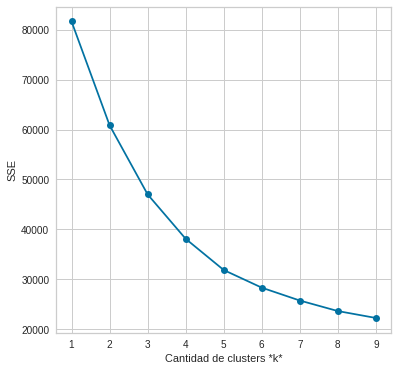

In [ ]:
import matplotlib.pyplot as plt

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [ ]:
k = 4

km = KMeans(
    n_clusters=k, init='random',
    n_init=10, random_state=0
)

y_km = km.fit_predict(scaled_1)

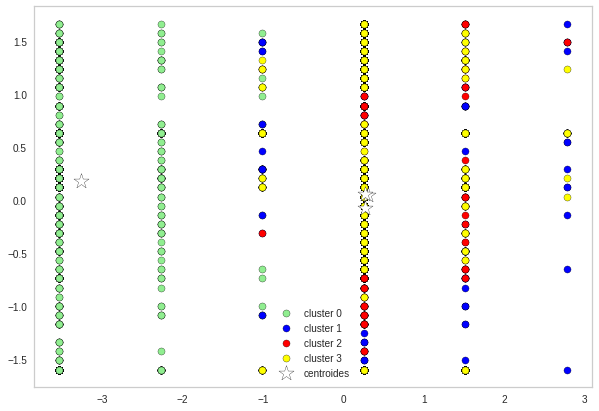

In [ ]:
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,7))

colors = ["lightgreen", "blue", "red", "yellow", "orange", "violet", "black", "pink", "grey"]

for i in range(k):
  plt.scatter(scaled_1[y_km == i, 0], scaled_1[y_km == i, 1],s=50, c=colors[i],marker='o', edgecolor='black',label='cluster '+str(i))

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='white', edgecolor='black',
    label='centroides'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
abandono['clusters'] = y_km
abandono.to_csv()

',estado_civil,carrera,horas_trabajadas,edad_ingreso,estado,clusters\n0,3,22,0,22,0,3\n1,4,26,0,21,1,3\n2,0,21,0,54,1,0\n3,3,0,0,28,1,3\n4,3,0,24,28,3,1\n5,3,0,6,26,3,2\n6,3,0,0,43,3,2\n7,3,26,0,30,3,2\n8,3,13,0,21,1,3\n9,3,0,40,22,3,1\n10,3,20,40,28,1,1\n11,3,13,0,23,3,2\n12,2,20,0,46,1,0\n13,3,0,0,33,3,2\n14,0,36,8,51,1,0\n15,3,32,0,20,3,2\n16,3,13,0,20,3,2\n17,3,12,0,19,3,2\n18,3,15,0,27,1,3\n19,0,20,0,34,3,0\n20,3,15,45,27,1,1\n21,3,20,8,34,3,2\n22,3,0,30,28,1,1\n23,3,0,25,26,1,3\n24,3,36,0,38,1,3\n25,3,36,45,30,1,1\n26,3,15,48,23,3,1\n27,3,0,20,24,1,3\n28,0,26,0,35,1,0\n29,3,0,60,21,2,1\n30,3,20,48,50,1,1\n31,1,26,40,47,1,0\n32,0,35,72,39,3,0\n33,3,16,30,24,1,1\n34,3,20,20,18,3,2\n35,4,21,40,43,3,1\n36,3,37,0,22,1,3\n37,3,31,30,46,3,1\n38,0,31,0,48,1,0\n39,3,31,0,31,1,3\n40,0,31,53,54,1,0\n41,2,31,24,55,3,0\n42,3,31,0,26,3,2\n43,3,25,30,37,1,1\n44,0,35,0,34,3,0\n45,0,0,45,39,3,0\n46,3,18,30,38,1,1\n47,3,15,35,46,3,1\n48,1,0,0,38,1,0\n49,3,20,9,27,1,3\n50,4,13,40,39,1,1\n51,0,20,0,

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

H = linkage(scaled_2, 'complete')

from scipy.spatial.distance import pdist, squareform

squareform(pdist(scaled_2[0:4,]))

array([[0.        , 0.40309888, 0.88102392, 0.67601236],
       [0.40309888, 0.        , 0.990472  , 0.72298689],
       [0.88102392, 0.990472  , 0.        , 0.93078081],
       [0.67601236, 0.72298689, 0.93078081, 0.        ]])

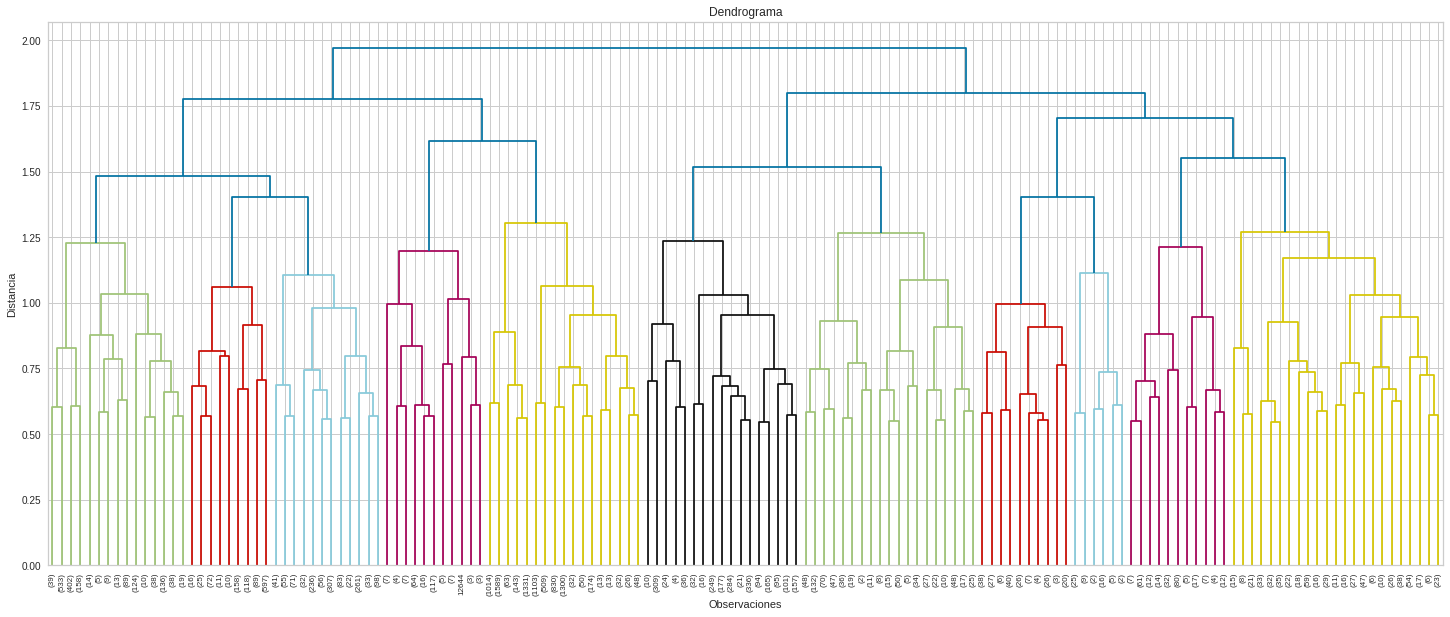

In [ ]:
max_d = 7.08
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_2)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled_2, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.31916236708325296
For n_clusters =3 silhouette score is 0.2743708079750484
For n_clusters =4 silhouette score is 0.29163974245511826


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd7b74e8d0>,
                     model=None)

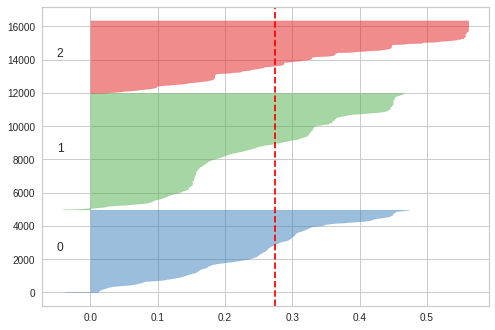

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled_2)    

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_1)

print(pca.components_)

import pandas as pd

df = pd.DataFrame(pca_data, columns=['Comp 1', 'Comp 2'])

df.loc[:,'cluster'] = y_km.copy()



[[-0.55932259  0.14567142  0.46019234  0.65213444 -0.16994635]
 [-0.22365221 -0.67620698  0.03322639  0.1159839   0.6914966 ]]


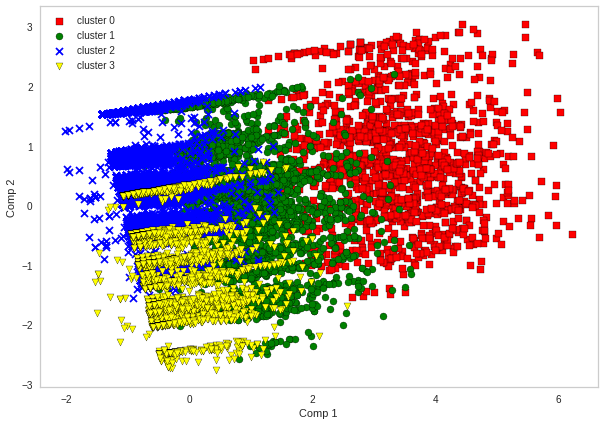

In [ ]:
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]
cluster3 = df[df['cluster'] == 3]

plt.figure(figsize=(10,7))

x = 'Comp 1'
y = 'Comp 2'

#scatter del primer cluster
plt.scatter(
    cluster0[x], cluster0[y],
    c='red',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    cluster1[x], cluster1[y],
    c='green',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    cluster2[x], cluster2[y],
    c='blue',
    marker='x', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    cluster3[x], cluster3[y],
    c='yellow',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)

plt.xlabel(x)
plt.ylabel(y)

plt.grid()
#lo imprime en pantalla
plt.show()